In [9]:
# Impor Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from PIL import Image
import sys
import cv2
from cv2 import aruco
from func import detect_objects

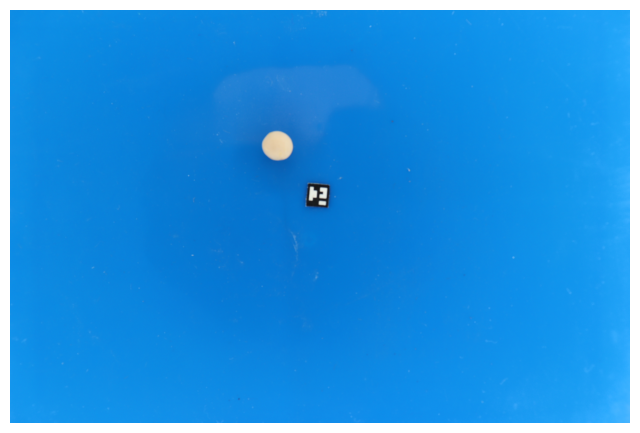

In [ ]:
# Read images using PIL
img = cv2.imread("IMG_1260.JPG")
cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv_img)
plt.axis("off")  # Hide axes
plt.show()
#cv2.imshow("image", img)

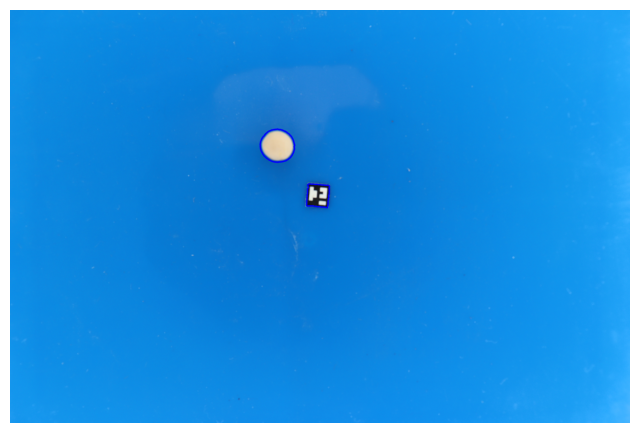

In [47]:
# draw contour around seed
img = cv2.imread("IMG_1260.JPG")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
contours = detect_objects(img)

# Draw Contours
for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0, 0, 255), 5)
    
# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


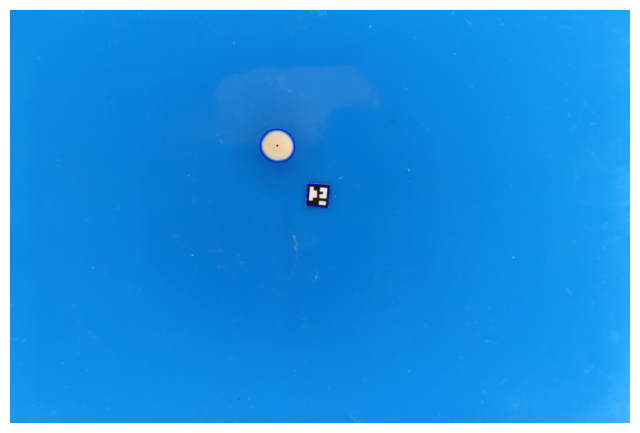

In [48]:
import numpy as np
img = cv2.imread("IMG_1260.JPG")
#img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
contours = detect_objects(img)

for cnt in contours:
  cv2.polylines(img, [cnt], True, (255,0,0), 2)

  #get rectangle
  (x,y), (w,h), angle = cv2.minAreaRect(cnt)
  rect = cv2.minAreaRect(cnt)

  #centroid only uses whole numbers
  cv2.circle(img, (int(x), int(y)), 5, (0,0, 255), -1)

  box = cv2.boxPoints(rect)
  box = np.int32(box)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Hide axes
plt.show()


In [42]:
# print x and y of center
import numpy as np
img = cv2.imread("IMG_1260.JPG")
#img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
contours = detect_objects(img)

for cnt in contours:
  cv2.polylines(img, [cnt], True, (255,0,0), 2)

  #get rectangle
  (x,y), (w,h), angle = cv2.minAreaRect(cnt)
  rect = cv2.minAreaRect(cnt)

# Print x and y results
  print("center x value :", x, "pixel")
  print("center y:", y, "pixel")
  print("width of rectangle:", w, "pixel")
  print("height of rectangle:", h, "pixel")



center x value : 1477.8228759765625 pixel
center y: 894.2889404296875 pixel
width of rectangle: 106.33784484863281 pixel
height of rectangle: 107.68061065673828 pixel
center x value : 1283.25 pixel
center y: 654.7499389648438 pixel
width of rectangle: 161.07891845703125 pixel
height of rectangle: 166.59437561035156 pixel


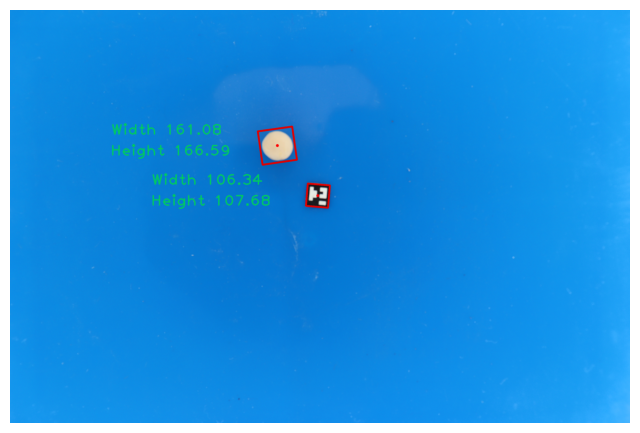

In [65]:
import cv2
from cv2 import aruco

parameters = cv2.aruco.DetectorParameters()
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

img = cv2.imread("IMG_1260.JPG")
contours = detect_objects(img)


for cnt in contours:
  rect = cv2.minAreaRect(cnt)
  (x,y), (w,h), angle = rect

  #centroid only uses whole numbers
  box = cv2.boxPoints(rect)
  box = np.int32(box)

  cv2.circle(img, (int(x), int(y)), 7, (0, 0, 255), -1)
  cv2.polylines(img, [box], True, (0,0,225), 7)


  cv2.putText(img, "Width {}".format(round(w, 2)), (int(x-800), int(y-50)), cv2.FONT_HERSHEY_PLAIN, 5, (100, 200, 0), 5)
  cv2.putText(img, "Height {}".format(round(h,2)), (int(x -800), int(y+50)), cv2.FONT_HERSHEY_PLAIN, 5, (100, 200, 0), 5)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Hide axes
plt.show()

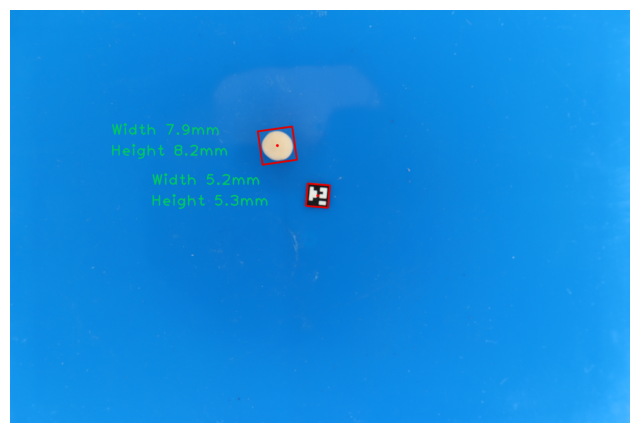

In [79]:
import cv2
from cv2 import aruco


#parameters = cv2.aruco.DetectorParameters_create()
parameters = cv2.aruco.DetectorParameters()
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)


img = cv2.imread("IMG_1260.JPG")

#corners, ids, rejected= cv2.aruco.detectMarkers(img, aruco_dict, parameters= parameters)

# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejected = detector.detectMarkers(img)

int_corners = np.int32(corners)
aruco_perimeter = cv2.arcLength(corners[0], True)


pixel_mm_ratio = aruco_perimeter / 20
contours = detect_objects(img)


for cnt in contours:
  rect = cv2.minAreaRect(cnt)
  (x,y), (w,h), angle = rect

  #centroid only uses whole numbers
  box = cv2.boxPoints(rect)
  box = np.int32(box)
  
  object_width = w / pixel_mm_ratio
  object_height = h / pixel_mm_ratio

  cv2.circle(img, (int(x), int(y)), 7, (0, 0, 255), -1)
  cv2.polylines(img, [box], True, (0,0,225), 7)


  cv2.putText(img, "Width {}mm".format(round(object_width, 1)), (int(x-800), int(y-50)), cv2.FONT_HERSHEY_PLAIN, 5, (100, 200, 0), 5)
  cv2.putText(img, "Height {}mm".format(round(object_height,1)), (int(x -800), int(y+50)), cv2.FONT_HERSHEY_PLAIN, 5, (100, 200, 0), 5)

  # cv2.putText(img1, "Width {}mm".format(round(object_width, 2)), (int(x-100), int(y-20)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
  # cv2.putText(img1, "Height {}mm".format(round(object_height,2)), (int(x -100), int(y+20)), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Hide axes
plt.show()